# **Categorizing Customer df_reviews**

## **Import Packages and Data**

In [148]:
# Import packages
import math
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords

import spacy
from spacy.lang.en import stop_words as spacy_stopwords

In [37]:
# Set style
sns.set_theme(style="whitegrid")

In [38]:
# Import data
df_reviews = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/imdb_reviews.tsv', 
                      sep = '\t', parse_dates=True)

In [39]:
# Data info
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  float64
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: float64(2

In [40]:
# Data head
display(df_reviews.sample(15))

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
45975,tt0067975,movie,What's the Matter with Helen?,What's the Matter with Helen?,1971,\N,101,0,"Crime,Musical,Mystery",6.4,1569.0,"Well, here's another terrific example of awkwa...",7,pos,1,train,12158
352,tt0445161,movie,4,4,2004,\N,126,0,"Drama,Mystery,Sci-Fi",6.6,2014.0,The movie starts quite with an intriguing scen...,1,neg,0,train,10736
9705,tt0229332,movie,Demon Cop,Demon Cop,1990,\N,81,0,"Crime,Horror",2.5,176.0,One night on an independent channel famous for...,1,neg,0,test,8196
30440,tt0850642,tvSeries,Shaggy & Scooby-Doo Get a Clue!,Shaggy & Scooby-Doo Get a Clue!,2006,2008,\N,0,"Action,Adventure,Animation",4.6,739.0,The animation looks like it was done in 30 sec...,1,neg,0,train,1949
38372,tt0079366,tvMovie,The Jericho Mile,The Jericho Mile,1979,\N,97,0,"Crime,Drama,Sport",7.3,1404.0,"I watch a lot of movies - DVD, features, and c...",10,pos,1,test,716
40765,tt0304584,tvMovie,The President's Man: A Line in the Sand,The President's Man: A Line in the Sand,2002,\N,90,0,"Action,Drama,Thriller",4.4,1128.0,"Ooverall, the movie was fairly good, a good ac...",7,pos,1,train,10795
33265,tt0117794,tvMovie,Susie Q,Susie Q,1996,\N,85,0,"Comedy,Drama,Family",7.3,2662.0,My kids loved this movie. we watched it every ...,8,pos,1,test,2773
24473,tt0203027,movie,Nobody,Nobody,1999,\N,\N,0,"Action,Thriller",7.0,107.0,it's a good watch if u have time - deals with ...,8,pos,1,test,4312
6097,tt0064117,movie,Cactus Flower,Cactus Flower,1969,\N,104,0,"Comedy,Romance",7.2,9237.0,Anyone who has ever doubted Ingrid Bergman's a...,7,pos,1,test,8728
17703,tt0268380,movie,Ice Age,Ice Age,2002,\N,81,0,"Adventure,Animation,Comedy",7.5,428517.0,"""Ice Age"" is one of the cartoon movies ever pr...",10,pos,1,train,9861


### Initial data observations

The dataset contains 47331 observations and 16 columns representing movie df_df_df_reviews and their classification, positive or negative. Runtime_minutes needs to be converted to int64. There are no missing values.

## **Prepare Data**

### Fix data types

In [41]:
# Check values of runtime
display(sorted(df_reviews['runtime_minutes'].unique()))

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '1140',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '183',
 '185',
 '186',
 '188',
 '189',
 '19',
 '190',
 '192',
 '194',
 '197',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '204',
 '208',
 '21',
 '210',
 '211',
 '212',
 '215',
 '216',
 '217',
 '219',
 '22',
 '222',
 '225',
 '229',
 '23',
 '230',
 '232',
 '233',
 '239',
 

Missing values for runtime were entered as '\\N', which is causing the data to be mis-typed as object. Changing '\\N' to np.nan will allow the variable to be converted to to float64.

In [42]:
# Replace '\\N' with np.nan
df_reviews['runtime_minutes'] = df_reviews['runtime_minutes'].replace('\\N', np.nan)

# Convert runtime to int64
df_reviews['runtime_minutes'] = df_reviews['runtime_minutes'].astype('float')

# Display info
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  46843 non-null  float64
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  float64
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: float64(3

Runtime_minutes is converted to float.

### Check for duplicates

In [43]:
# Check for full duplicates
duplicates_count = df_reviews.duplicated().sum()

print(f'Number of full duplicates: {duplicates_count}')

Number of full duplicates: 0


There are no fully duplicate rows.

In [44]:
# Check for review duplicates
review_duplicates = df_reviews['review'].duplicated().sum()

print(f'Number of duplicated review texts: {review_duplicates}')

Number of duplicated review texts: 91


There are 91 duplicated df_reviews. Print rows to further inspect the duplication.

In [45]:
# Print duplicated rows
duplicate_review_text = df_reviews['review'].duplicated(keep=False)

display(df_reviews[duplicate_review_text])

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
1368,tt0081949,tvMiniSeries,A Town Like Alice,A Town Like Alice,1981,1981,301.0,0,"Drama,Romance,War",8.3,849.0,I have seen this film at least 100 times and I...,10,pos,1,test,9765
1370,tt0081949,tvMiniSeries,A Town Like Alice,A Town Like Alice,1981,1981,301.0,0,"Drama,Romance,War",8.3,849.0,I have seen this film at least 100 times and I...,10,pos,1,test,9768
1629,tt0098994,movie,"After Dark, My Sweet","After Dark, My Sweet",1990,\N,114.0,0,"Crime,Drama,Mystery",6.6,3098.0,THE JIST: See something else. This film was hi...,7,pos,1,train,7728
1630,tt0098994,movie,"After Dark, My Sweet","After Dark, My Sweet",1990,\N,114.0,0,"Crime,Drama,Mystery",6.6,3098.0,THE JIST: See something else. This film was hi...,7,pos,1,train,7729
1753,tt0086662,tvSeries,Airwolf,Airwolf,1984,1986,60.0,0,"Action,Adventure,Sci-Fi",6.7,9592.0,I used to watch this show when I was a little ...,9,pos,1,train,6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,tt0463392,movie,Zombie Nation,Zombie Nation,2004,\N,81.0,0,Horror,2.0,7850.0,German filmmaker Ulli Lommel has managed a tas...,1,neg,0,train,10089
47194,tt0463392,movie,Zombie Nation,Zombie Nation,2004,\N,81.0,0,Horror,2.0,7850.0,German filmmaker Ulli Lommel has managed a tas...,1,neg,0,train,10108
47288,tt0972534,tvSeries,iCarly,iCarly,2007,2012,30.0,0,"Comedy,Family,Romance",6.6,31143.0,Nickelodeon has gone down the toilet. They hav...,1,neg,0,test,5652
47290,tt0972534,tvSeries,iCarly,iCarly,2007,2012,30.0,0,"Comedy,Family,Romance",6.6,31143.0,Nickelodeon has gone down the toilet. They hav...,1,neg,0,test,5655


The rows are fully duplicated other than the idx index variable. Duplicates will be dropped from the dataset.

In [46]:
# Drop duplicates
reivews = df_reviews.drop_duplicates(subset=['review'], inplace=True)

duplicates_new = df_reviews['review'].duplicated().sum()

print(f'Updated number of duplicates: {duplicates_new}')

Updated number of duplicates: 0


Duplicates have been removed from the dataset.

## Missing values

In [47]:
# Replace all '\N' with np.nan
df_reviews = df_reviews.replace('\\N', np.nan)

In [48]:
# Calculate number and percent of missing values by columns
missing = df_reviews.isna().sum().reset_index().rename(columns=
                                                       {'index':'column',
                                                        0:'count'})

missing['percent'] = ((missing['count'] / len(df_reviews)) * 100).round(2)

print('Missing Values:')
display(missing)

Missing Values:


,column,count,percent
0,tconst,0,0.00
1,title_type,0,0.00
2,primary_title,0,0.00
3,original_title,0,0.00
4,start_year,0,0.00
5,end_year,44967,95.19
6,runtime_minutes,488,1.03
7,is_adult,0,0.00
8,genres,26,0.06
9,average_rating,2,0.00


End_year is missing over 95% of values, runtime_minutes is missing 1% of valeus, and genres, average_rating, and votes are all missing less than 1% of values. Because of the high number missing in end_year, this variable will be dropped from the analysis. The number missing in other variables is so low that imputation isn't necessary. The rows missing information will be dropped from the dataset.

In [49]:
# Drop rows missing values in runtime, genre, rating, or votes
df_reviews = df_reviews.dropna(subset=['runtime_minutes', 'genres', 'average_rating', 'votes'])

missing_dropped = df_reviews.isna().sum().reset_index().rename(columns=
                                                       {'index':'column',
                                                        0:'count'})

missing_dropped['percent'] = ((missing_dropped['count'] / len(df_reviews)) * 100).round(2)

print('Missing values after dropping missing rows:')
display(missing_dropped)

Missing values after dropping missing rows:


,column,count,percent
0,tconst,0,0.0
1,title_type,0,0.0
2,primary_title,0,0.0
3,original_title,0,0.0
4,start_year,0,0.0
5,end_year,44586,95.4
6,runtime_minutes,0,0.0
7,is_adult,0,0.0
8,genres,0,0.0
9,average_rating,0,0.0


There are no more missing values, after dropping rows missing in the runtime, genre, rating, and votes subest. End_year will be left out of analyses.

### Prepare data conclusion

Duplicates and missing values have been dropped from the dataset. The data is ready for analysis.

## **Exploratory data analysis**

### Number of unique titles

In [50]:
# Find number of movies reviewed in the dataset
movie_count = df_reviews['primary_title'].nunique()

print(f'Number of unique movie titles: {movie_count}')

Number of unique movie titles: 6420


### Reviews by media type

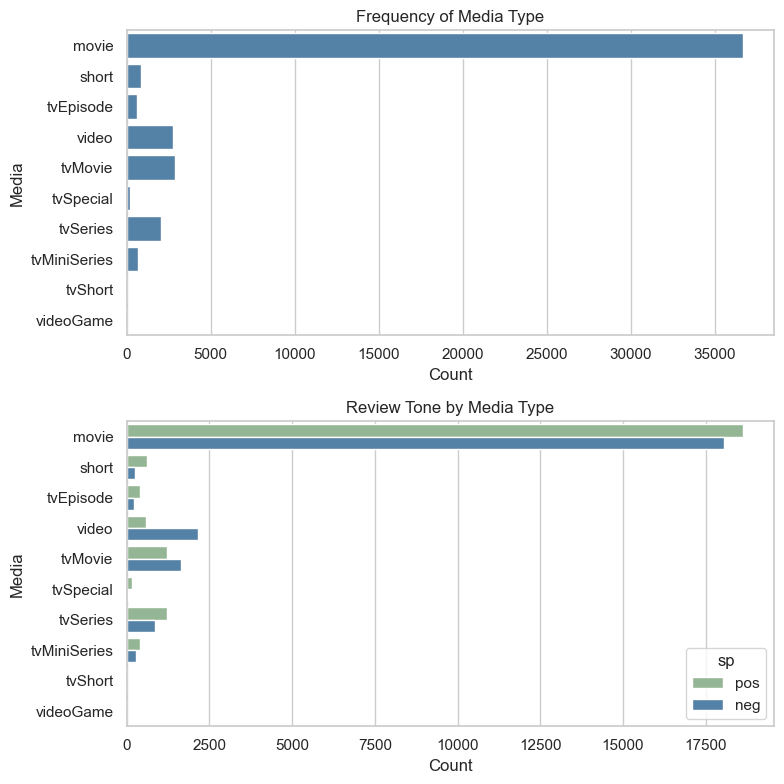

In [51]:
# Graph number of movies and review tone by media type
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Media frequency plot
type_count = sns.countplot(ax=axs[0], data=df_reviews, y='title_type', color='steelblue')
type_count.set(title='Frequency of Media Type', xlabel='Count', ylabel='Media')

# Review tone by media plot
type_review = sns.countplot(ax=axs[1], data=df_reviews, y='title_type', hue='sp', 
                            hue_order=['pos', 'neg'], palette=('darkseagreen', 'steelblue'))
type_review.set(title='Review Tone by Media Type', xlabel='Count', ylabel='Media')

# Show plots
fig.tight_layout()
plt.show()

Most reviews are for movies. There are only a small number of reviews for other media types such as shorts, tv episodes, videos, tv movies, etc. Movies, shorts, tv episodes, and tv series tend to have more positive than negative reviews. Videos and tvmovies have more negative than positive reviews.

### Movies and reviews by year

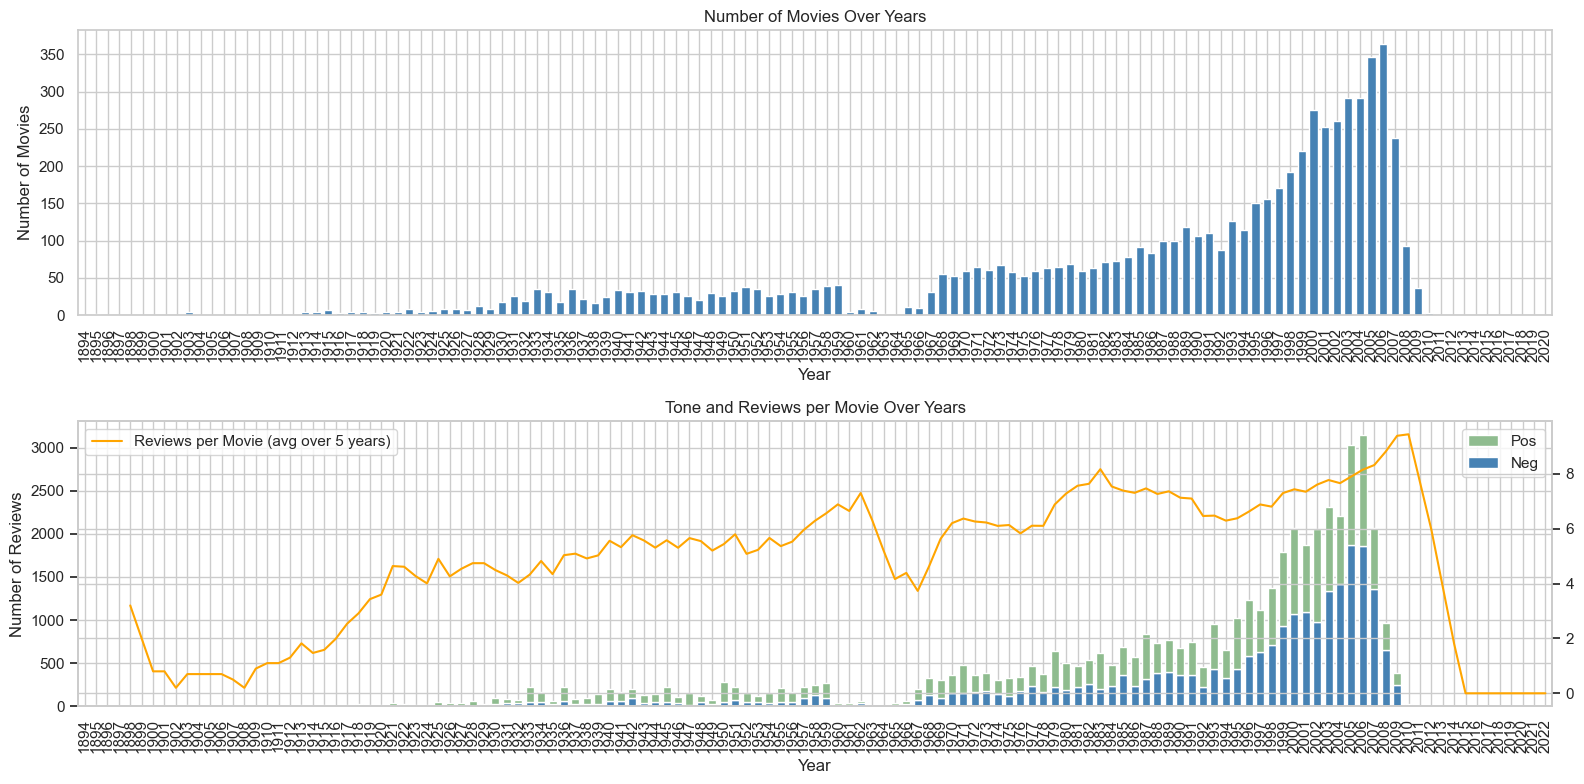

In [52]:
# Create supblots
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

# Number of movies by year
ax0 = axs[0]

movies_year = df_reviews.groupby('start_year')['tconst'].nunique()
movies_year = movies_year.reindex(index=np.arange(movies_year.index.min(), 
                                    max(movies_year.index.max(), 2021))).fillna(0)

movies_year.plot(kind='bar', color='steelblue', ax=ax0,
                 title='Number of Movies Over Years', xlabel='Year', 
                 ylabel='Number of Movies', width=0.7)

# Tone of review over time
ax1 = axs[1]

pos_year = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
pos_year = pos_year.reindex(index=np.arange(pos_year.index.min(), 
                                            max(pos_year.index.max(), 2023)), fill_value=0)

pos_year.plot(kind='bar', ax=ax1, stacked=True, color=['steelblue', 'darkseagreen'],
              legend='reverse', width=0.7)

plt.title('Tone and Reviews per Movie Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
ax1.add_artist(ax1.legend(['Neg', 'Pos'], reverse=True))

# Add rolling average reviews per movie over 5 years
axt = ax1.twinx() 

review_total = df_reviews.groupby('start_year')['tconst'].count()
review_total = review_total.reindex(index=np.arange(review_total.index.min(), 
                                                    max(review_total.index.max(), 2023))).fillna(0)
review_movie_year = (review_total / movies_year).fillna(0)

review_movie_year.reset_index(drop=True).rolling(5).mean() \
.plot(kind='line', ax=axt, color='orange', label='Reviews per Movie (avg over 5 years)')

lines, labels = axt.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Display figures
fig.tight_layout()
plt.show()

The number of movies per year generally increases over time until 2006, when we see a sharp decline in number of movies produced per year. There are generally similar numbers of positive and negative reviews per year. The number of reviews per movie tends to increase over time, from about 1 review per movie in the early 1900s to amost 10 reviews per movie in 2010.

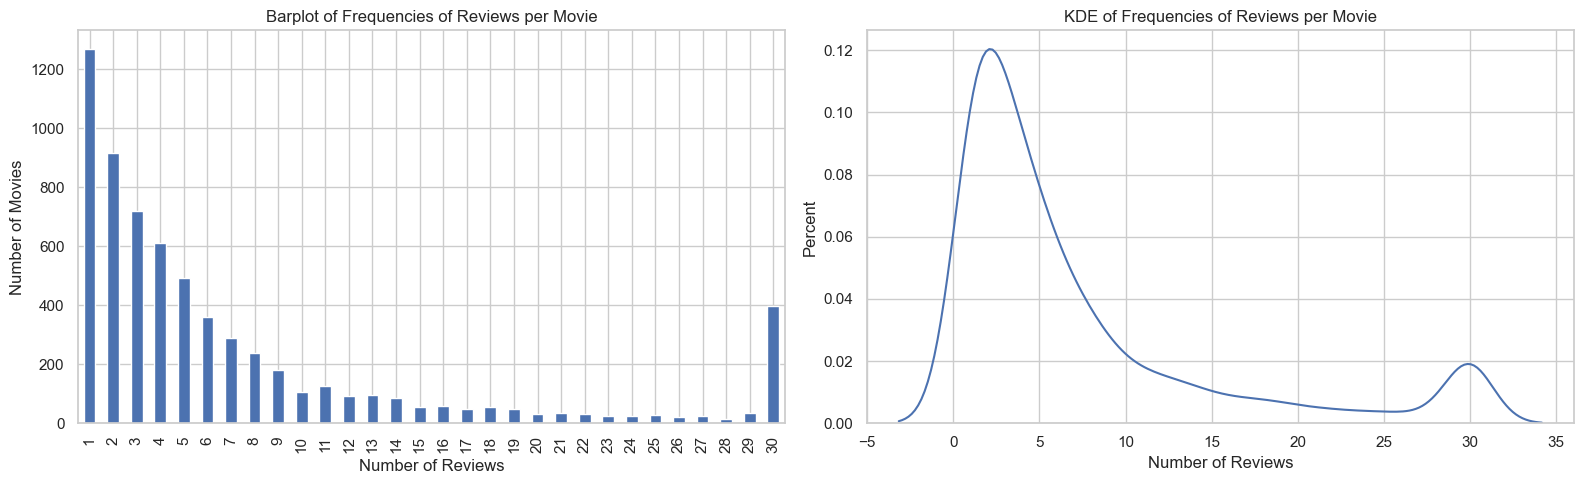

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

review_movie = df_reviews.groupby('tconst')['review'].count() \
    .value_counts().sort_index()

# Barplot of review per movie frequency
ax0 = axs[0]

review_movie.plot(kind='bar', ax=ax0, title='Barplot of Frequencies of Reviews per Movie',
                  xlabel='Number of Reviews', ylabel='Number of Movies')

# KDE of review per movie frequency
ax1 = axs[1]

review_movie = df_reviews.groupby('tconst')['review'].count()

sns.kdeplot(data=review_movie, ax=ax1)

ax1.set_title('KDE of Frequencies of Reviews per Movie')
ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Percent')

# Display
fig.tight_layout()
plt.show()

Most movies tend to recieve betweeen 1 - 5 reviews per movie. The number of movies tends to decrease as the number of reviews increase, though there is a spike in a number of movies that have recieved 30 reviews.

### Examine train and test set

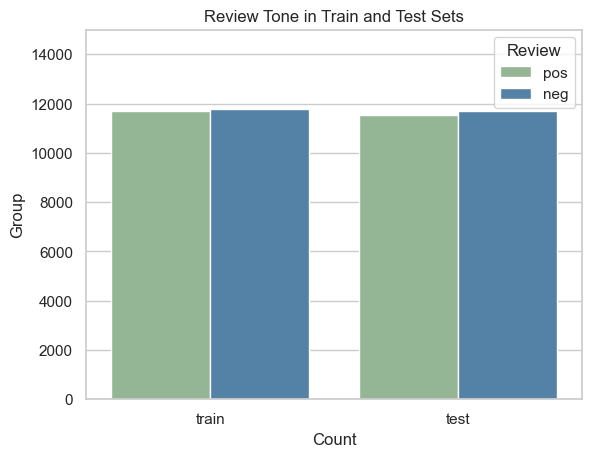

In [54]:
# Plot positive and negative review in train and test
ds_group_tone = sns.countplot(data=df_reviews, x='ds_part', hue='sp', hue_order=['pos', 'neg'],
              palette=('darkseagreen', 'steelblue'))

ds_group_tone.set(title='Review Tone in Train and Test Sets', xlabel='Count', ylabel='Group')

plt.legend(title='Review')
plt.ylim([0, 15000])

plt.show()

There are similar numbers of positive and negative reviews in the training and test sets. Additionally, there are similar numbers of positive reviews and similar numbers of negative reviews across the training and test sets. The classes are mostly balanced, and the trianing and test set are similar to each other.

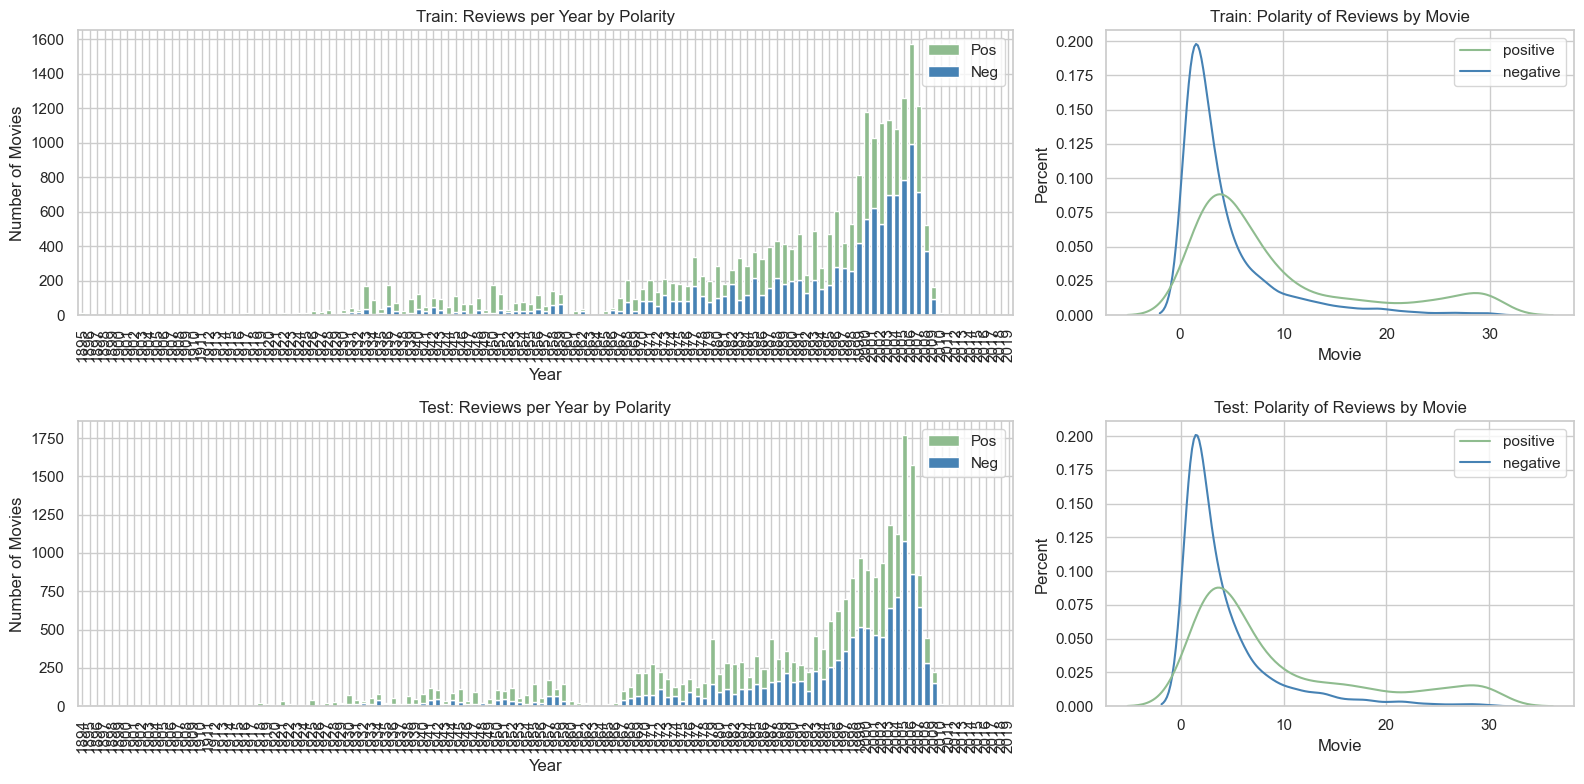

In [55]:
# Chart review tone by year for train/test
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

# Plot train movies over time
ax0 = axs[0][0]

df_train_year = df_reviews[df_reviews['ds_part'] == 'train'].groupby(['start_year', 'pos'])['pos'].count().unstack()
df_train_year = df_train_year.reindex(index=np.arange(df_train_year.index.min(), max(df_train_year.index.max(), 2020))).fillna(0)

df_train_year.plot(kind='bar', ax=ax0, stacked=True, color=['steelblue', 'darkseagreen'], width=0.7,
                   title='Train: Reviews per Year by Polarity', xlabel='Year', ylabel='Number of Movies')

ax0.legend(['Neg', 'Pos'], reverse=True)

# Train density plot review tone by movie
ax1 = axs[0][1]

tone_train = df_reviews[df_reviews['ds_part'] == 'train'].groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(tone_train[0], color='steelblue', label='negative', ax=ax1)
sns.kdeplot(tone_train[1], color='darkseagreen', label='positive', ax=ax1)

ax1.legend(reverse=True)

ax1.set_title('Train: Polarity of Reviews by Movie')
ax1.set_xlabel('Movie')
ax1.set_ylabel('Percent')

# Test movies over time
ax2 = axs[1][0]

df_test_year = df_reviews[df_reviews['ds_part'] == 'test'].groupby(['start_year', 'pos'])['pos'].count().unstack()
df_test_year = df_test_year.reindex(index=np.arange(df_test_year.index.min(), max(df_test_year.index.max(), 2020))).fillna(0)

df_test_year.plot(kind='bar', ax=ax2, stacked=True, color=['steelblue', 'darkseagreen'], width=0.7,
                   title='Test: Reviews per Year by Polarity', xlabel='Year', ylabel='Number of Movies')

ax2.legend(['Neg', 'Pos'], reverse=True)

# Test review tone by movie
ax3 = axs[1][1]

tone_test = df_reviews[df_reviews['ds_part'] == 'test'].groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(tone_test[0], color='steelblue', label='negative', ax=ax3)
sns.kdeplot(tone_test[1], color='darkseagreen', label='positive', ax=ax3)

ax3.legend(reverse=True)

ax3.set_title('Test: Polarity of Reviews by Movie')
ax3.set_xlabel('Movie')
ax3.set_ylabel('Percent')

# Display
fig.tight_layout()
plt.show()

There are similar distributions of movie reviews by year and by polarity in the training and test sets. The sets are similar and can be used to train and test the model.

### Exploratory analysis conclusion

## **Evaluation Procedure**

Create evaluation routine which can be used for all models in this project.

In [56]:
def evaluate_model(model, features_train, target_train, features_test, target_test):
    '''Displays the F1 score curve, ROC curve, and precision recall curve, and a
    data frame of ROC, APS, Accuracy, and F1 score for training and test sets.
    
    model: fitted classification model
    features_train: features of the training set
    target_train: target for the training set
    features_test: features of the test set
    target_test: target for the test set'''
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    
    for type, features, target in (('train', features_train, target_train), ('test', features_test, target_test)):
        
        eval_stats[type] = {}
        
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1 scores
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc
        
        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        # Plot threshold curves
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'
            
        # F1 score curve
        ax0 = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax0.plot(f1_thresholds, f1_scores, color=color, 
                label=f'{type}, max={f1_scores[max_f1_score_idx]:2f} @ {f1_thresholds[max_f1_score_idx]:2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax0.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], 
                    color=marker_color, marker='X', markersize=7)
        ax0.set_xlim([-0.02, 1.02])
        ax0.set_ylim([-0.02, 1.02])
        ax0.set_xlabel('Threshold')
        ax0.set_ylabel('F1')
        ax0.legend(loc='lower center')
        ax0.set_title('F1 Score')
            
        # ROC curve
        ax1 = axs[1]
        ax1.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax1.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, 
                    marker='X', markersize=7)
        ax1.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax1.set_xlim([-0.02, 1.02])
        ax1.set_ylim([-0.02, 1.02])
        ax1.set_xlabel('FPR')
        ax1.set_ylabel('TPR')
        ax1.legend(loc='lower center')
        ax1.set_title('ROC Curve')


        # PRC
        ax2 = axs[2]
        ax2.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax2.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, 
                    marker='X', markersize=7)
        ax2.set_xlim([-0.02, 1.02])    
        ax2.set_ylim([-0.02, 1.02])
        ax2.set_xlabel('recall')
        ax2.set_ylabel('precision')
        ax2.legend(loc='lower center')
        ax2.set_title(f'PRC') 
        
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
        
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## **Normalization**

Remove special characters and numbers from text and convert to lowercase.

In [57]:
# Define function to normalize text
def normalize_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z']", ' ', text)
    text = text.split()
    text = " ".join(text)
    
    return text

# Apply normalize function to review column
df_reviews['reviews_norm'] = df_reviews['review'].apply(normalize_text)

display(df_reviews[['review', 'reviews_norm']].head())

,review,reviews_norm
0,The pakage implies that Warren Beatty and Gold...,the pakage implies that warren beatty and gold...
1,How the hell did they get this made?! Presenti...,how the hell did they get this made presenting...
2,There is no real story the film seems more lik...,there is no real story the film seems more lik...
3,Um .... a serious film about troubled teens in...,um a serious film about troubled teens in sing...
4,I'm totally agree with GarryJohal from Singapo...,i'm totally agree with garryjohal from singapo...


Reviews are converted to lowercase with special characters removed.

## **Train/Validate/Test Split**

In [58]:
# Define train and test subsets
df_train = df_reviews[df_reviews['ds_part'] == 'train']
df_test = df_reviews[df_reviews['ds_part'] == 'test']

# Split train into train and validate
df_train, df_validate = train_test_split(df_train, test_size=0.3, random_state=123)

# Define train and test targets
targ_train = df_train['pos']
targ_valid = df_validate['pos']
targ_test = df_test['pos']

print(f'Train Shape: {df_train.shape}')
print(f'Validate Shape: {df_validate.shape}')
print(f'Test Shape: {df_test.shape}')

Train Shape: (16452, 18)
Validate Shape: (7052, 18)
Test Shape: (23232, 18)


Training and test set are split approximately 50/50 split. The test set has 270 fewer observations than the training set.

## **NLP Classification Models**

Train models to classify the tone of the review.

### Model 0 - Constant Model

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


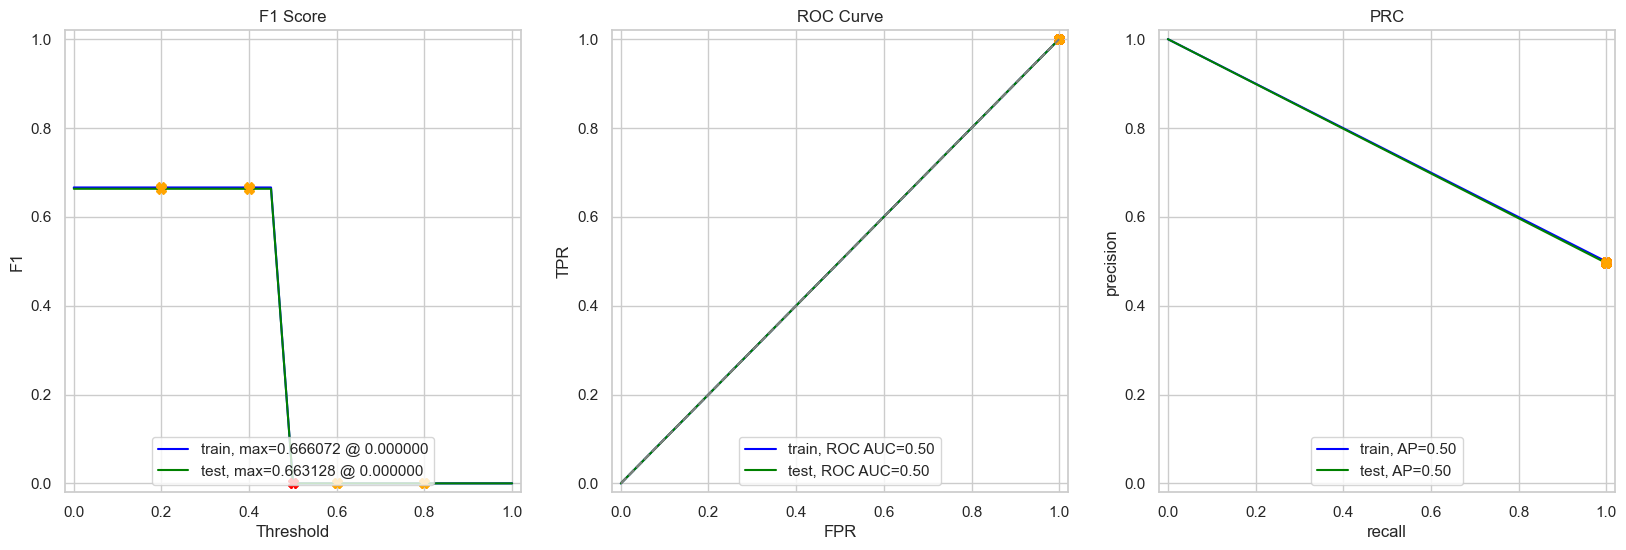

In [59]:
# Fit dummy model
dummy = DummyClassifier().fit(df_train['reviews_norm'], targ_train)

# Evalate train and test set
evaluate_model(dummy, df_train['reviews_norm'], targ_train, df_validate['reviews_norm'], targ_valid)

### Model 1 - NLTK, TF-IDF and Logistic Regression

In [60]:
# Lemmatize reviews with nltk lemmatizer
nltk_lemmatizer = WordNetLemmatizer()

def nltk_lemmatize(text):
    nltk_tokens = word_tokenize(text)
    nltk_lemmas = [nltk_lemmatizer.lemmatize(token) for token in nltk_tokens]
    nltk_lemmas = " ".join(nltk_lemmas)
    return nltk_lemmas

df_train['reviews_nltk_lemma'] = df_train['reviews_norm'].apply(nltk_lemmatize)
df_validate['reviews_nltk_lemma'] = df_validate['reviews_norm'].apply(nltk_lemmatize)

display(df_train.head())

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,reviews_norm,reviews_nltk_lemma
43080,tt0071075,tvSeries,The World at War,The World at War,1973,1976,52.0,0,"Documentary,History,War",9.2,20944.0,War is hell. But this documentary of WWII is h...,10,pos,1,train,6488,war is hell but this documentary of wwii is he...,war is hell but this documentary of wwii is he...
13421,tt0049223,movie,Forbidden Planet,Forbidden Planet,1956,NaN,98.0,0,"Action,Adventure,Sci-Fi",7.6,44037.0,The only thing I knew about this film prior to...,8,pos,1,train,7720,the only thing i knew about this film prior to...,the only thing i knew about this film prior to...
27388,tt0083468,tvMiniSeries,Q.E.D.,Q.E.D.,1982,NaN,60.0,0,"Adventure,Comedy,Mystery",7.9,123.0,Q.E.D. was a brilliant TV series and it truly ...,8,pos,1,train,2715,q e d was a brilliant tv series and it truly w...,q e d wa a brilliant tv series and it truly wa...
35656,tt0088939,movie,The Color Purple,The Color Purple,1985,NaN,154.0,0,Drama,7.8,75667.0,"Rating ""10/10"" Master piece Some years ago, i ...",10,pos,1,train,374,rating master piece some years ago i heard spi...,rating master piece some year ago i heard spie...
25820,tt0100332,movie,Paris Is Burning,Paris Is Burning,1990,NaN,71.0,0,Documentary,8.2,11793.0,Growing up in NYC in the late 80's/early 90's ...,10,pos,1,train,9589,growing up in nyc in the late 's early 's club...,growing up in nyc in the late 's early 's club...


Reviews are lemmatized via the nltk lemmatizer.

In [132]:
# Initiate pre-processor
stop_words = nltk_stopwords.words('english')

# Create TF-IDF features for text, OHE categorical, and scale numeric
column_trans_nltk = ColumnTransformer(
    [('text_nltk', TfidfVectorizer(stop_words=stop_words), 'reviews_nltk_lemma'),
    ('categorical', OneHotEncoder(), ['title_type']),
    ('numeric', StandardScaler(), ['start_year', 'runtime_minutes']),
    ('pass', 'passthrough', ['is_adult'])],
    remainder='drop'
)

# Fit and transform train, transform validate
df_train_nltk = column_trans_nltk.fit_transform(df_train)
df_valid_nltk = column_trans_nltk.transform(df_validate)

print(f'NLTK Train DF Shape: {df_train_nltk.shape}')
print(f'NLTK Validate DF Shape: {df_valid_nltk.shape}')

NLTK Train DF Shape: (16452, 55146)
NLTK Validate DF Shape: (7052, 55146)


Train and validate set features have been fit and transformed. Text is broken into TF-IDF matrix, categorical features are OHE, and numeric features are min max scaled.

In [133]:
# Define features and target
feat_train_nltk = df_train_nltk
feat_valid_nltk = df_valid_nltk

targ_train_nltk = df_train['pos']
targ_valid_nltk = df_validate['pos']

In [134]:
# Run logistic regression
log_reg = LogisticRegression(max_iter=200)

log_reg.fit(feat_train_nltk, targ_train_nltk)

LogisticRegression(max_iter=200)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.89
APS        0.98  0.95
ROC AUC    0.98  0.95


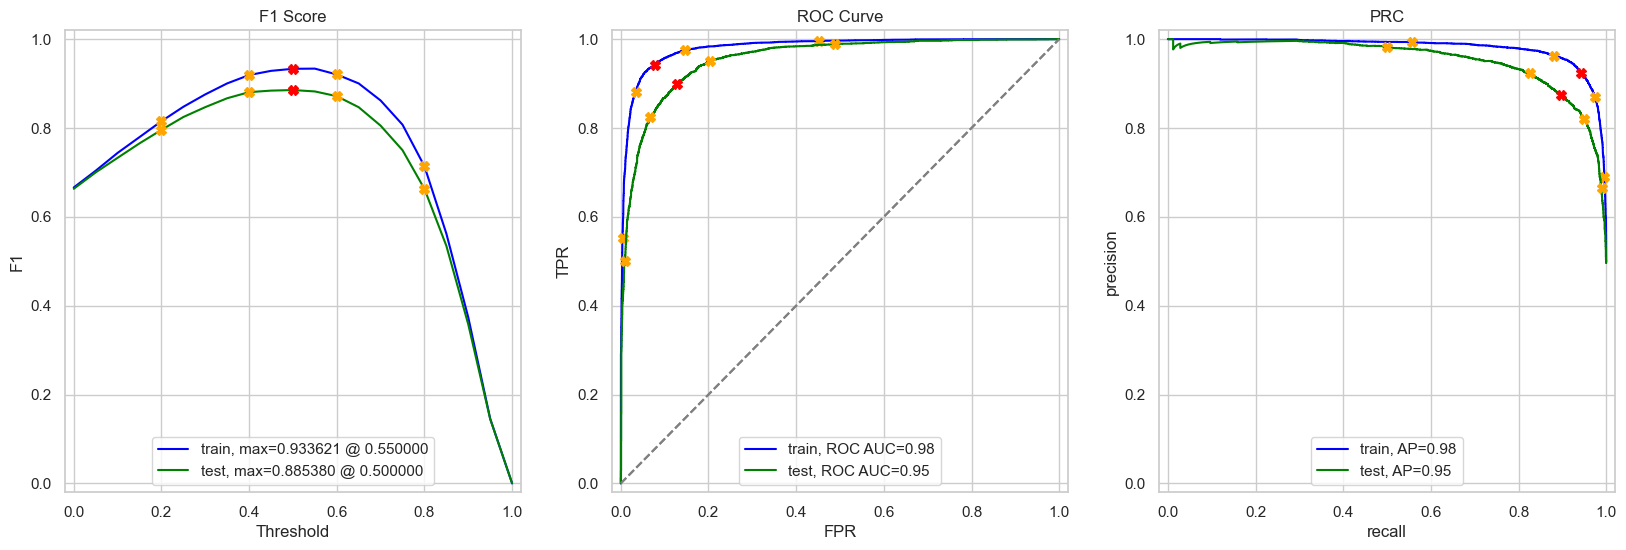

In [135]:
# Evaluate logistic regression
evaluate_model(log_reg, feat_train_nltk, targ_train_nltk, feat_valid_nltk, targ_valid_nltk)

Logistic regression with text vectorized with NLTK TF-IDF was able to achieve a maximum F1 score of 0.89 at a threshold of 0.50. It had a validation ROC AUC of 0.95 and a validation PRC of 0.95. This model is fairly good at classifying reviews based on media type, year, runtime, and review text.

### Model 2 - spaCy, TF-IDF, and Logistic Regression

In [147]:
# Lemmatize reviews with spaCy lemmatizer
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def spacy_lemmatize(text):
    tokens = nlp(text)
    spacy_lemmas = [token.lemma_ for token in tokens]
    spacy_lemmas = " ".join(spacy_lemmas)
    
    return spacy_lemmas

df_train['reviews_spacy_lemmas'] = df_train['reviews_norm'].apply(spacy_lemmatize)
df_validate['reviews_spacy_lemmas'] = df_validate['reviews_norm'].apply(spacy_lemmatize)

display(df_train.head())

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,reviews_norm,reviews_nltk_lemma,reviews_spacy_lemmas
43080,tt0071075,tvSeries,The World at War,The World at War,1973,1976,52.0,0,"Documentary,History,War",9.2,20944.0,War is hell. But this documentary of WWII is h...,10,pos,1,train,6488,war is hell but this documentary of wwii is he...,war is hell but this documentary of wwii is he...,war be hell but this documentary of wwii be he...
13421,tt0049223,movie,Forbidden Planet,Forbidden Planet,1956,NaN,98.0,0,"Action,Adventure,Sci-Fi",7.6,44037.0,The only thing I knew about this film prior to...,8,pos,1,train,7720,the only thing i knew about this film prior to...,the only thing i knew about this film prior to...,the only thing I know about this film prior to...
27388,tt0083468,tvMiniSeries,Q.E.D.,Q.E.D.,1982,NaN,60.0,0,"Adventure,Comedy,Mystery",7.9,123.0,Q.E.D. was a brilliant TV series and it truly ...,8,pos,1,train,2715,q e d was a brilliant tv series and it truly w...,q e d wa a brilliant tv series and it truly wa...,q e d be a brilliant tv series and it truly be...
35656,tt0088939,movie,The Color Purple,The Color Purple,1985,NaN,154.0,0,Drama,7.8,75667.0,"Rating ""10/10"" Master piece Some years ago, i ...",10,pos,1,train,374,rating master piece some years ago i heard spi...,rating master piece some year ago i heard spie...,rating master piece some year ago I hear spiel...
25820,tt0100332,movie,Paris Is Burning,Paris Is Burning,1990,NaN,71.0,0,Documentary,8.2,11793.0,Growing up in NYC in the late 80's/early 90's ...,10,pos,1,train,9589,growing up in nyc in the late 's early 's club...,growing up in nyc in the late 's early 's club...,grow up in nyc in the late 's early 's club sc...


In [154]:
stop_words = list(nlp.Defaults.stop_words)

column_trans_spacy = ColumnTransformer(
    [('text_spacy', TfidfVectorizer(stop_words = stop_words), 'reviews_spacy_lemmas'),
    ('categorical', OneHotEncoder(), ['title_type']),
    ('numeric', StandardScaler(), ['start_year', 'runtime_minutes']),
    ('pass', 'passthrough', ['is_adult'])],
    remainder='drop'
)

# Fit and transform train, transform validate
df_train_spacy = column_trans_spacy.fit_transform(df_train)
df_valid_spacy = column_trans_spacy.transform(df_validate)

print(f'NLTK Train DF Shape: {df_train_spacy.shape}')
print(f'NLTK Validate DF Shape: {df_valid_spacy.shape}')

/Users/kellyshreeve/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


NLTK Train DF Shape: (16452, 50220)
NLTK Validate DF Shape: (7052, 50220)


In [155]:
# Define features and target
feat_train_spacy = df_train_spacy
feat_valid_spacy = df_valid_spacy

targ_train = df_train['pos']
targ_valid = df_validate['pos']

In [158]:
log_reg_spacy = LogisticRegression(max_iter=300)

log_reg_spacy.fit(feat_train_spacy, targ_train)

LogisticRegression(max_iter=300)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


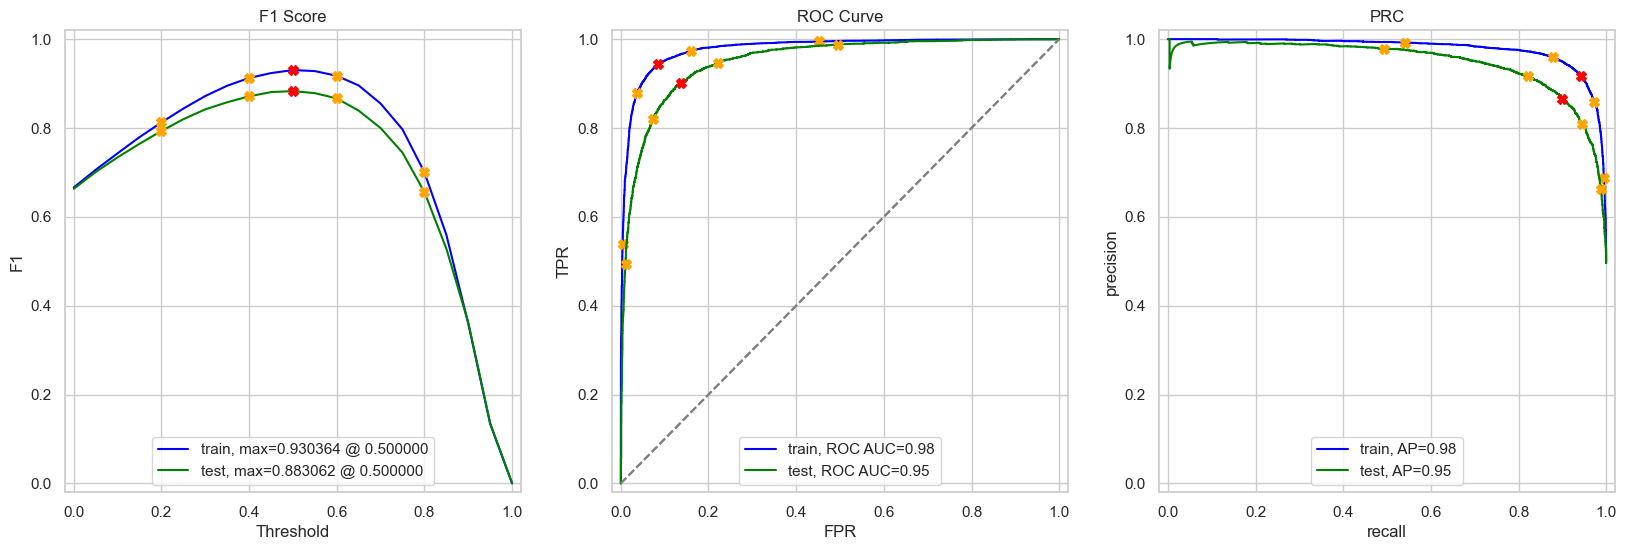

In [159]:
evaluate_model(log_reg_spacy, feat_train_spacy, targ_train, 
               feat_valid_spacy, targ_valid)

### Model 3 - spaCy, TF-IDF and LGBMClassifier

### Model 4 - BERT